<a href="https://colab.research.google.com/github/Dheesiga/Bharat-Intern/blob/task-3/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras import layers
import cv2, os
from tqdm import tqdm
from random import shuffle
import shutil

In [ ]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip"
!unzip -qo dogvcat.zip

--2023-12-28 13:41:07--  https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.158.179, 52.219.160.183, 52.219.158.91, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.158.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60547127 (58M) [application/zip]
Saving to: ‘dogvcat.zip’

dogvcat.zip         100%[===================>]  57.74M  12.8MB/s    in 5.8s    

2023-12-28 13:41:14 (9.95 MB/s) - ‘dogvcat.zip’ saved [60547127/60547127]



In [ ]:
train_dir= "./datset/training"
test_dir= "./datset/testing/"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split= 0.2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'training')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'validation')

Found 19860 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(50,50,1), padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0

In [65]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=20, validation_data=val_generator, validation_steps=50)

Epoch 1/20
993/993 [==============================] - 70s 68ms/step - loss: 0.6818 - accuracy: 0.5512 - val_loss: 0.6494 - val_accuracy: 0.6210
Epoch 2/20
993/993 [==============================] - 70s 70ms/step - loss: 0.6400 - accuracy: 0.6372 - val_loss: 0.6046 - val_accuracy: 0.6770
Epoch 3/20
993/993 [==============================] - 67s 67ms/step - loss: 0.5913 - accuracy: 0.6926 - val_loss: 0.5502 - val_accuracy: 0.7250
Epoch 4/20
993/993 [==============================] - 69s 69ms/step - loss: 0.5401 - accuracy: 0.7317 - val_loss: 0.5239 - val_accuracy: 0.7430
Epoch 5/20
993/993 [==============================] - 69s 69ms/step - loss: 0.5067 - accuracy: 0.7556 - val_loss: 0.5281 - val_accuracy: 0.7490
Epoch 6/20
993/993 [==============================] - 69s 69ms/step - loss: 0.4742 - accuracy: 0.7785 - val_loss: 0.4663 - val_accuracy: 0.7810
Epoch 7/20
993/993 [==============================] - 66s 67ms/step - loss: 0.4547 - accuracy: 0.7861 - val_loss: 0.4451 - val_accuracy:

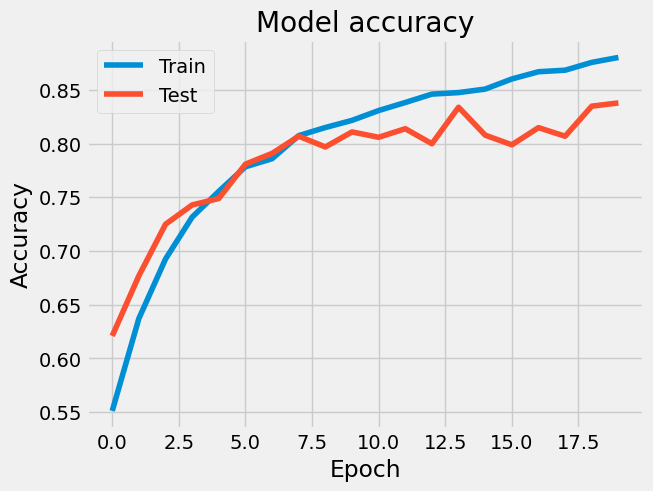

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

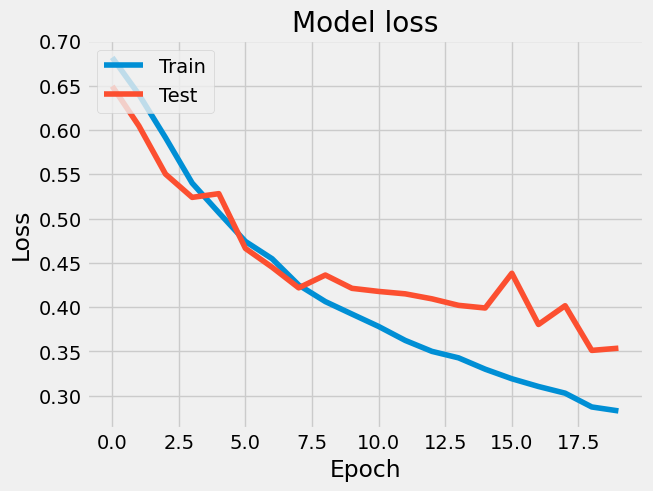

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

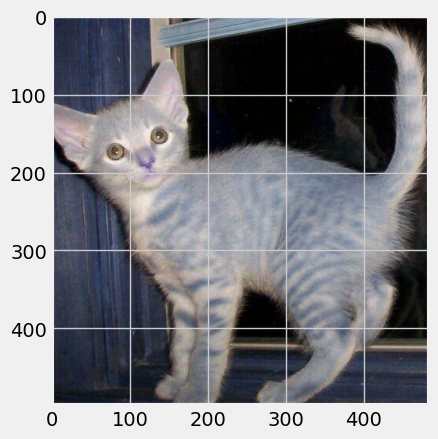

1/1 [==============================] - 0s 304ms/step
cat


In [69]:
from tensorflow.keras.preprocessing.image import img_to_array
import cv2
import numpy as np

def Single_Image_Prediction(file):
    # Load and display the original image
    image = cv2.imread(file)
    plt.imshow(image)
    plt.show()

    # Convert the image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to the model's expected input shape (50x50)
    image = cv2.resize(image, (50, 50))

    # Normalize the pixel values to the range [0, 1]
    img_arr = img_to_array(image) / 255.

    # Expand dimensions to create a batch of size 1
    np_image = np.expand_dims(img_arr, axis=0)

    return np_image

image = Single_Image_Prediction('./datset/testing/6.jpg')
pred_value = model.predict(image)

if pred_value < 0.5:
    print('cat')
else:
    print('dog')


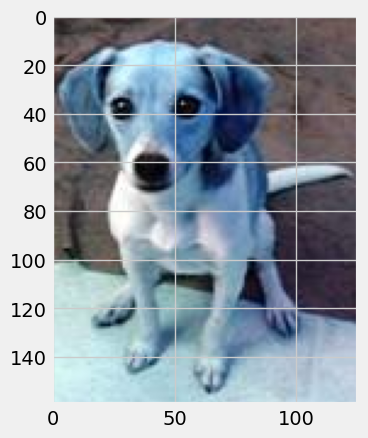

1/1 [==============================] - 0s 27ms/step
dog


In [70]:
image = Single_Image_Prediction('./datset/testing/9.jpg')
pred_value = model.predict(image)

if pred_value < 0.5:
    print('cat')
else:
    print('dog')